<a href="https://colab.research.google.com/github/sarveshyadav9/DataScienceIntern-LetsGrowMore/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

****

Data Science Intern@LetsGrowMore Virtual Intership

Name - Sarvesh Yadav

Task 2- Prediction Using Decision Tree Algorithm

In [3]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
iris = pd.read_csv('/iris.csv')
iris.describe() 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [13]:
iris.head()#gives top five row of iris dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [15]:
iris.shape

(150, 6)

In [16]:
iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [17]:
iris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


Splitting the data

In [22]:
train,test = train_test_split(iris,test_size=0.25)

Training Data

In [23]:
train

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
126,127,6.2,2.8,4.8,1.8,Iris-virginica
47,48,4.6,3.2,1.4,0.2,Iris-setosa
28,29,5.2,3.4,1.4,0.2,Iris-setosa
10,11,5.4,3.7,1.5,0.2,Iris-setosa
123,124,6.3,2.7,4.9,1.8,Iris-virginica
...,...,...,...,...,...,...
61,62,5.9,3.0,4.2,1.5,Iris-versicolor
145,146,6.7,3.0,5.2,2.3,Iris-virginica
82,83,5.8,2.7,3.9,1.2,Iris-versicolor
95,96,5.7,3.0,4.2,1.2,Iris-versicolor


Testing data

In [25]:
test

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
9,10,4.9,3.1,1.5,0.1,Iris-setosa
25,26,5.0,3.0,1.6,0.2,Iris-setosa
85,86,6.0,3.4,4.5,1.6,Iris-versicolor
119,120,6.0,2.2,5.0,1.5,Iris-virginica
88,89,5.6,3.0,4.1,1.3,Iris-versicolor
93,94,5.0,2.3,3.3,1.0,Iris-versicolor
44,45,5.1,3.8,1.9,0.4,Iris-setosa
37,38,4.9,3.1,1.5,0.1,Iris-setosa
124,125,6.7,3.3,5.7,2.1,Iris-virginica
58,59,6.6,2.9,4.6,1.3,Iris-versicolor


Again Splitting the data for training data


In [26]:
# train_X contains all the feature only
train_X=train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

In [27]:
# train_y contain the label
train_y=train.Species

In [28]:
train_X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
126,6.2,2.8,4.8,1.8
47,4.6,3.2,1.4,0.2
28,5.2,3.4,1.4,0.2
10,5.4,3.7,1.5,0.2
123,6.3,2.7,4.9,1.8
...,...,...,...,...
61,5.9,3.0,4.2,1.5
145,6.7,3.0,5.2,2.3
82,5.8,2.7,3.9,1.2
95,5.7,3.0,4.2,1.2


In [29]:
train_y

126     Iris-virginica
47         Iris-setosa
28         Iris-setosa
10         Iris-setosa
123     Iris-virginica
            ...       
61     Iris-versicolor
145     Iris-virginica
82     Iris-versicolor
95     Iris-versicolor
36         Iris-setosa
Name: Species, Length: 112, dtype: object

Splitting the same data for testing data

In [30]:
## test_X contains the all feature
## test_y containns the label only
test_X=test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

test_y=test.Species

Modal Making

2 Model by using decision Tree classifier

In [31]:
#model by using Decision tree
model=DecisionTreeClassifier()
model.fit(train_X,train_y)

DecisionTreeClassifier()

Visualization

[Text(0.5357142857142857, 0.9166666666666666, 'X[2] <= 2.45\ngini = 0.665\nsamples = 112\nvalue = [35, 36, 41]'),
 Text(0.4642857142857143, 0.75, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.6071428571428571, 0.75, 'X[3] <= 1.75\ngini = 0.498\nsamples = 77\nvalue = [0, 36, 41]'),
 Text(0.35714285714285715, 0.5833333333333334, 'X[2] <= 5.05\ngini = 0.145\nsamples = 38\nvalue = [0, 35, 3]'),
 Text(0.21428571428571427, 0.4166666666666667, 'X[0] <= 4.95\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.14285714285714285, 0.25, 'X[3] <= 1.35\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.07142857142857142, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.21428571428571427, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.2857142857142857, 0.25, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(0.5, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.4285714285714285

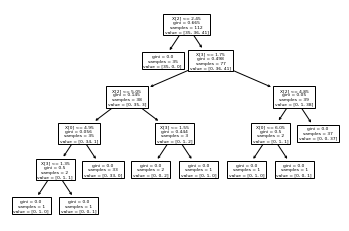

In [32]:
tree.plot_tree(model)

Prediction by Decision Tree Classfier

In [33]:
## Prediction by the test_X variable in which the testing data is stored
pred=model.predict(test_X)
print(pred)

['Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica']


Check the Accuracy

In [34]:
act2=metrics.accuracy_score(pred,test_y)
print("Test accuracy by decision tree classifier  ",(act2*100))

Test accuracy by decision tree classifier   92.10526315789474
